In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# from google.colab import drive
# drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
df = pd.read_csv(r"C:\Users\Bipin\Downloads\Cardio Vascular Prediction with Deployment\cardio_train.csv", delimiter=';')
# df = pd.read_csv(r"/content/drive/MyDrive/All Projects/ML/Cardio Vascular Prediction with Deployment/cardio_train.csv", delimiter=',')

In [76]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [78]:
df.isna().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [79]:
df.shape

(70000, 13)

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [81]:
df.drop('id', axis = 1, inplace = True)

In [82]:
df['weight'] = df['weight'].astype(int)

In [83]:
df['age'] = df['age']/365

In [84]:
df['bmi'] = df['weight']/(df['height']/100)**2

In [85]:
df['age'] = df['age'].astype(int)

In [86]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56,100,60,1,1,0,0,0,0,23.011177


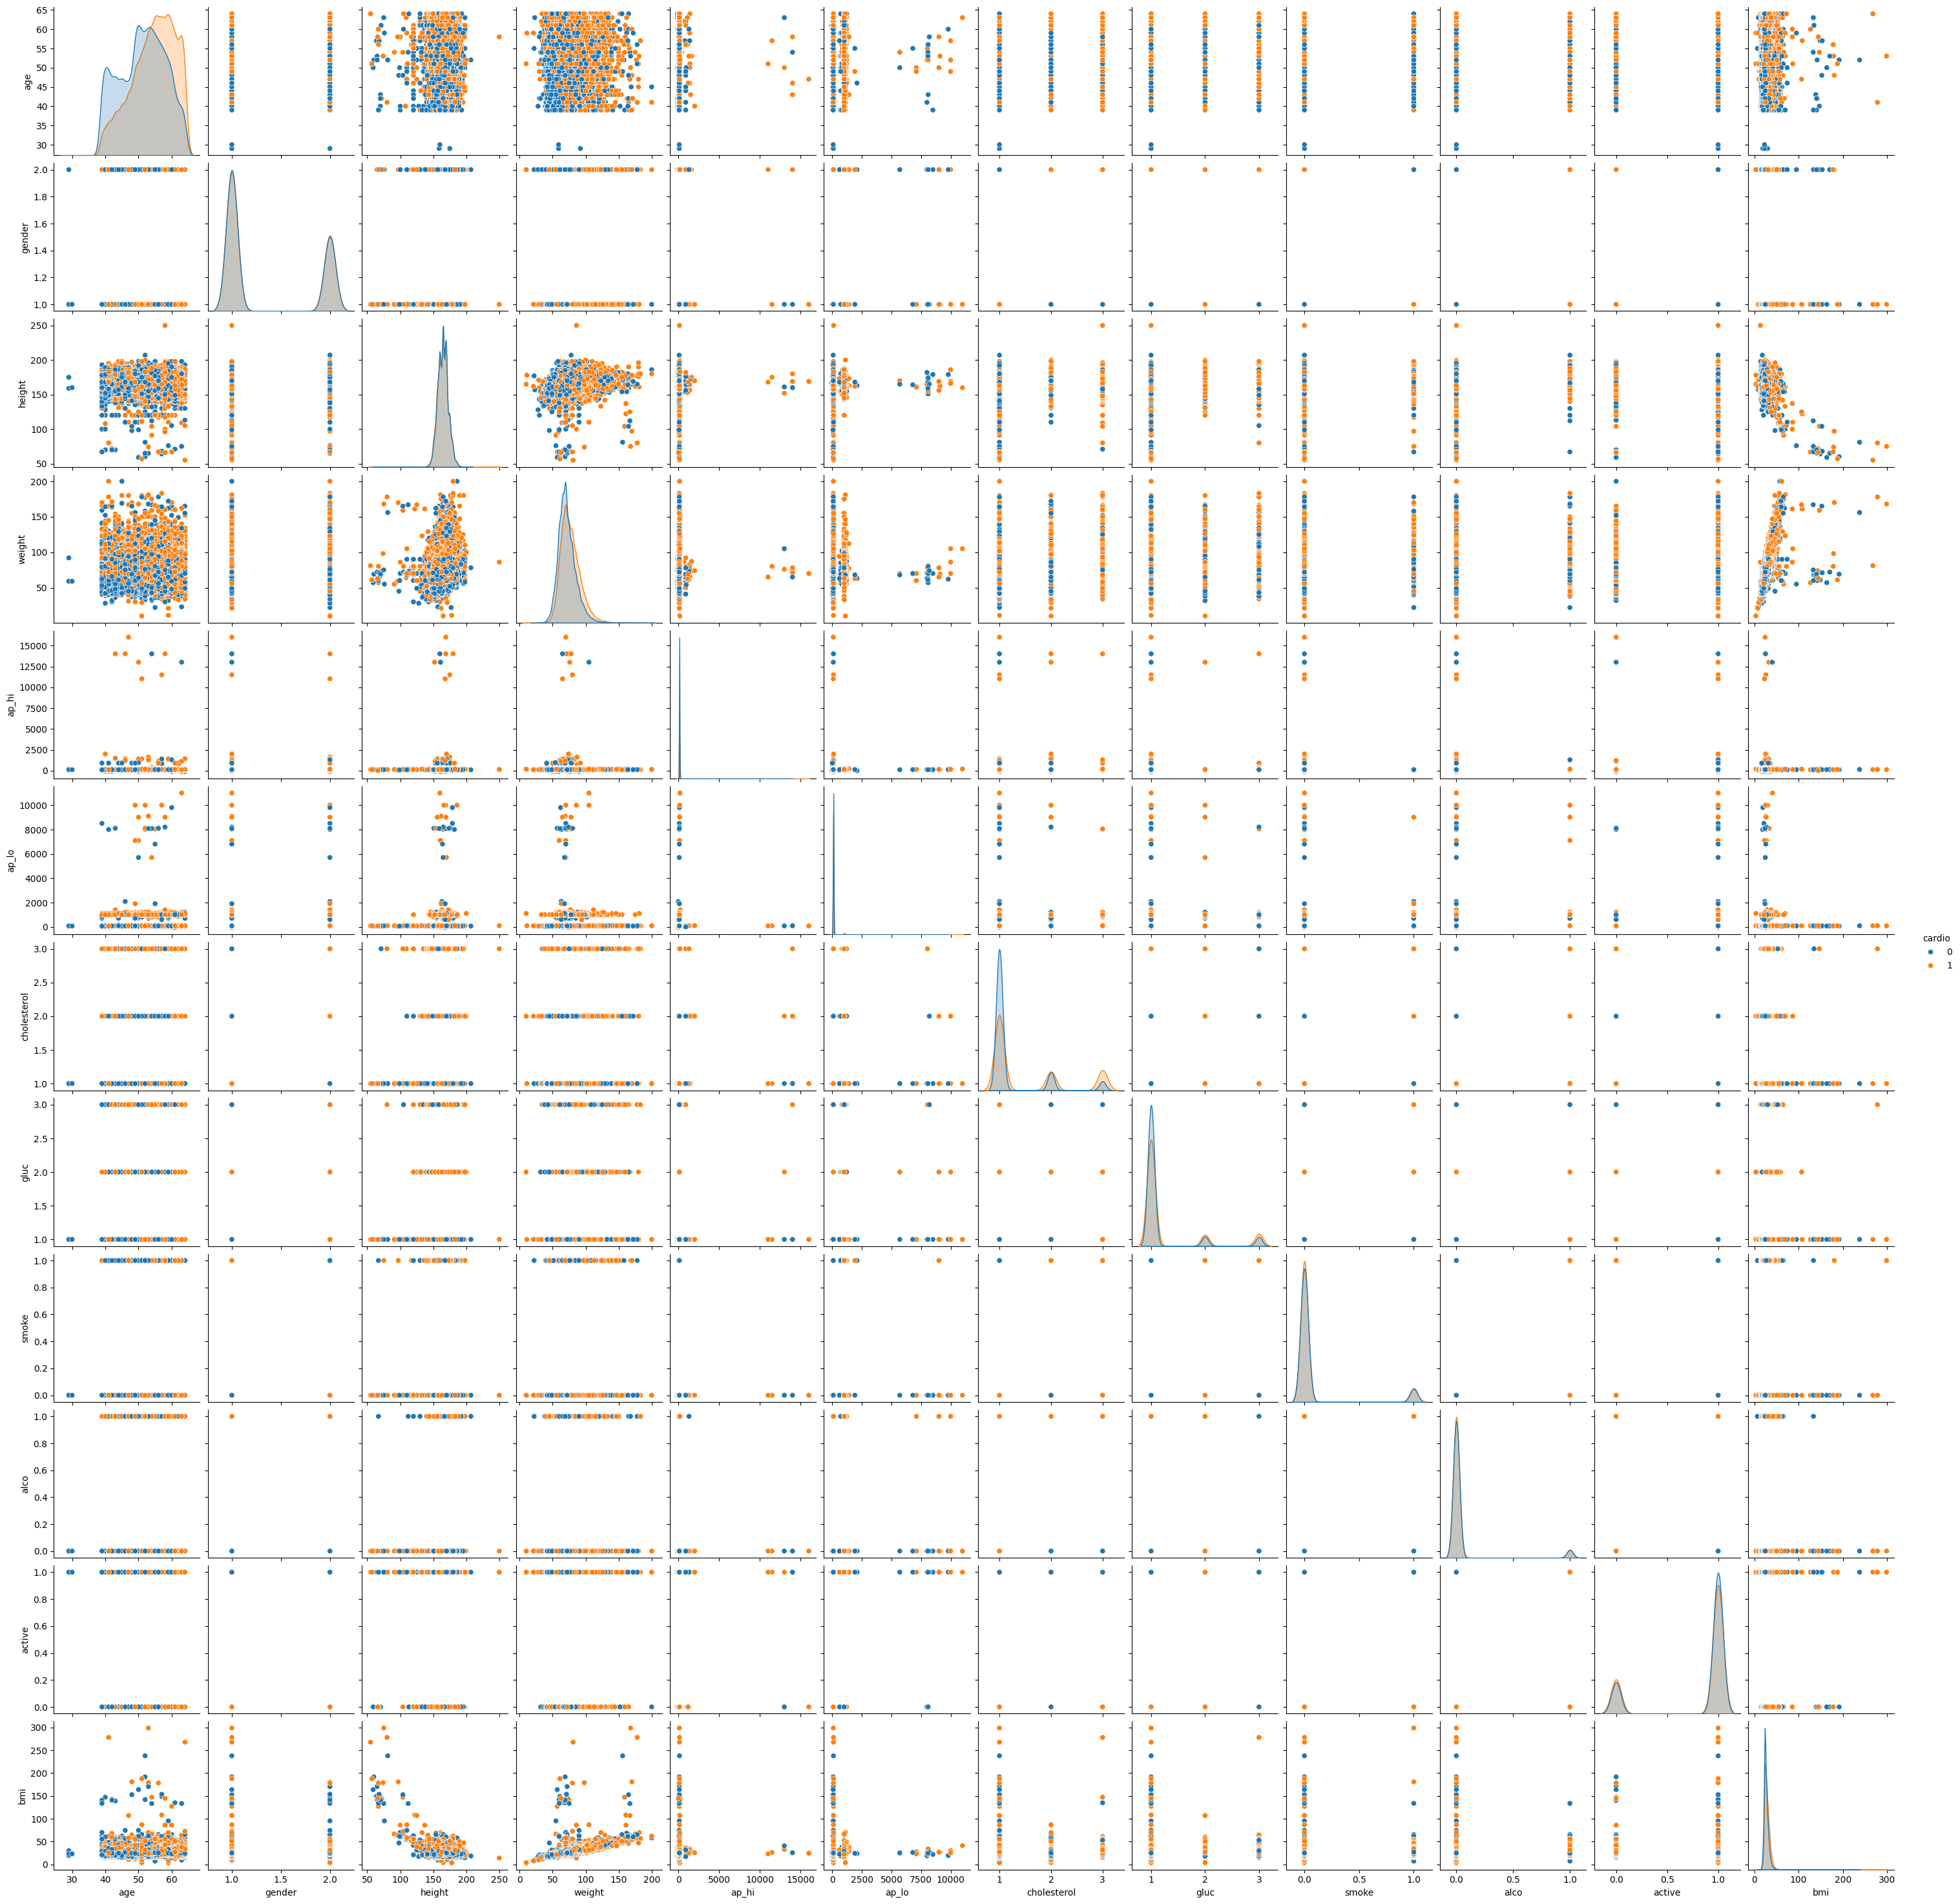

In [87]:
sns.pairplot(df, hue = 'cardio')

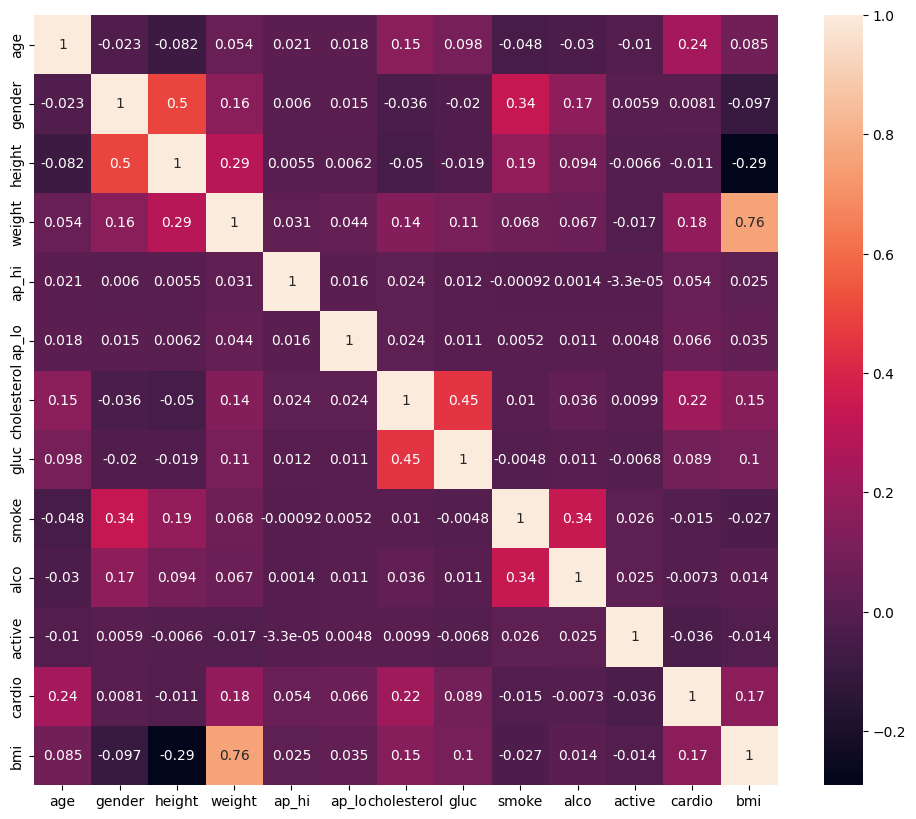

In [88]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True)
plt.show()


In [89]:
x = df.drop(['cardio'], axis = 1)
y = df['cardio']

In [90]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,50,2,168,62,110,80,1,1,0,0,1,21.967120
1,55,1,156,85,140,90,3,1,0,0,1,34.927679
2,51,1,165,64,130,70,3,1,0,0,0,23.507805
3,48,2,169,82,150,100,1,1,0,0,1,28.710479
4,47,1,156,56,100,60,1,1,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76,120,80,1,1,1,0,1,26.927438
69996,61,1,158,126,140,90,2,2,0,0,1,50.472681
69997,52,2,183,105,180,90,3,1,0,1,0,31.353579
69998,61,1,163,72,135,80,1,2,0,0,0,27.099251


In [91]:
y.head()

,cardio
0,0
1,1
2,1
3,1
4,0


In [92]:
# x.value_counts()

In [93]:
y.value_counts()

,count
cardio,
0,35021
1,34979


In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
SMOTE = SMOTE()

In [96]:
x,y = SMOTE.fit_resample(x,y)

In [97]:
x.value_counts()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  bmi      
50   1       165     65      120    80     1            1     0      0     1       23.875115    20
54   1       165     65      120    80     1            1     0      0     1       23.875115    20
56   1       160     60      120    80     1            1     0      0     1       23.437500    20
49   1       160     60      120    80     1            1     0      0     1       23.437500    18
56   1       165     65      120    80     1            1     0      0     1       23.875115    18
                                                                                                ..
50   2       163     75      100    70     1            1     0      0     1       28.228386     1
                     79      120    80     1            1     1      0     1       29.733900     1
                             140    90     2            1     0      0     1       29.733900     1
                     80      130    90     1            1     0      0     1       30.110279     1
64   2       193     70      110    70     3            1     1      1     1       18.792451     1
Name: count, Length: 65471, dtype: int64

In [98]:
y.value_counts()

,count
cardio,
0,35021
1,35021


In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
sc = StandardScaler()

In [102]:
xcols = x.columns

In [103]:
x = sc.fit_transform(x)

In [104]:
x = pd.DataFrame(x, columns = xcols)

In [105]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,-0.419798,1.364512,0.443496,-0.847739,-0.122242,-0.088284,-0.539305,-0.395643,-0.310777,-0.238309,0.494251,-0.917658
1,0.319106,-0.732862,-1.018251,0.749733,0.072608,-0.035219,2.401108,-0.395643,-0.310777,-0.238309,0.494251,1.210249
2,-0.272017,-0.732862,0.078059,-0.708828,0.007658,-0.141350,2.401108,-0.395643,-0.310777,-0.238309,-2.023263,-0.664703
3,-0.715359,1.364512,0.565308,0.541367,0.137558,0.017847,-0.539305,-0.395643,-0.310777,-0.238309,0.494251,0.189489
4,-0.863140,-0.732862,-1.018251,-1.264470,-0.187192,-0.194416,-0.539305,-0.395643,-0.310777,-0.238309,-2.023263,-0.746241
...,...,...,...,...,...,...,...,...,...,...,...,...
70037,0.171325,-0.732862,0.078059,0.055180,0.202508,-0.035219,-0.539305,-0.395643,-0.310777,-0.238309,0.494251,-0.031371
70038,-1.010921,-0.732862,-0.287378,-0.986649,0.267458,-0.088284,-0.539305,-0.395643,-0.310777,-0.238309,0.494251,-0.768357
70039,1.353571,-0.732862,-0.287378,1.444285,0.007658,-0.088284,-0.539305,1.352175,-0.310777,-0.238309,0.494251,1.425013
70040,0.023544,-0.732862,-1.749124,-1.472836,0.072608,-0.088284,0.930902,-0.395643,-0.310777,-0.238309,-2.023263,-0.656863


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [108]:
x_train.shape, y_train.shape

((56033, 12), (56033,))

In [109]:
x_test.shape, y_test.shape

((14009, 12), (14009,))

In [110]:
pip install xgboost

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [112]:
lr = LogisticRegression()

In [113]:
lr.fit(x_train, y_train)

LogisticRegression()

In [114]:
pred = lr.predict(x_test)

In [115]:
from sklearn.metrics import classification_report

In [116]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6924
           1       0.75      0.68      0.71      7085

    accuracy                           0.72     14009
   macro avg       0.73      0.72      0.72     14009
weighted avg       0.73      0.72      0.72     14009



In [117]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.724177314583482


In [118]:
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)

gbc.fit(x_train, y_train)
pred = gbc.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6924
           1       0.77      0.71      0.74      7085

    accuracy                           0.74     14009
   macro avg       0.74      0.74      0.74     14009
weighted avg       0.74      0.74      0.74     14009

0.7430937254622029


In [119]:
svc = SVC()

svc.fit(x_train, y_train)
pred = svc.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6924
           1       0.75      0.70      0.73      7085

    accuracy                           0.73     14009
   macro avg       0.74      0.73      0.73     14009
weighted avg       0.74      0.73      0.73     14009

0.734313655507174


In [120]:
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,pred))


              precision    recall  f1-score   support

           0       0.71      0.72      0.71      6924
           1       0.72      0.71      0.72      7085

    accuracy                           0.72     14009
   macro avg       0.72      0.72      0.72     14009
weighted avg       0.72      0.72      0.72     14009

0.7152544792633307


In [121]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,pred))



              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6924
           1       0.65      0.63      0.64      7085

    accuracy                           0.64     14009
   macro avg       0.64      0.64      0.64     14009
weighted avg       0.64      0.64      0.64     14009

0.6370190591762438


In [122]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6924
           1       0.77      0.71      0.74      7085

    accuracy                           0.74     14009
   macro avg       0.75      0.74      0.74     14009
weighted avg       0.75      0.74      0.74     14009

0.7437361696052538


In [123]:
# # Grid Search

# param_grids = {
#     'LogisticRegression': {
#         'C': [0.1, 1, 10, 100],
#         'solver': ['liblinear', 'lbfgs']
#     },
#     'DecisionTreeClassifier': {
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 10, 20]
#     },
#     'RandomForestClassifier': {
#         'n_estimators': [10, 50, 100],
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 10, 20]
#     },
#     'SVC': {
#         'C': [0.1, 1, 10, 100],
#         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#         'gamma': ['scale', 'auto']
#     },
#     'KNeighborsClassifier': {
#         'n_neighbors': np.arange(1, 50),
#         'weights': ['uniform', 'distance'],
#         'metric': ['euclidean', 'manhattan', 'minkowski']
#     },
#     'GradientBoostingClassifier': {
#         'n_estimators': [50, 100, 200],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [3, 5, 7]
#     },
#     'XGBClassifier': {
#         'n_estimators': [50, 100, 200],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [3, 5, 7]
#     }
# }

# # Step 4: Perform GridSearchCV for each model
# models = {
#     'LogisticRegression': LogisticRegression(),
#     'DecisionTreeClassifier': DecisionTreeClassifier(),
#     'RandomForestClassifier': RandomForestClassifier(),
#     'SVC': SVC(),
#     'KNeighborsClassifier': KNeighborsClassifier(),
#     'GradientBoostingClassifier': GradientBoostingClassifier(),
#     'XGBClassifier': XGBClassifier()
# }

# best_estimators = {}
# for model_name, model in models.items():
#     print(f"Tuning {model_name}...")
#     grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
#     grid_search.fit(x_train, y_train)
#     best_estimators[model_name] = grid_search.best_estimator_
#     print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
#     print(f"Best Cross-Validation Score for {model_name}: {grid_search.best_score_:.2f}\n")

# # Step 5: Evaluate the best models on the test set
# for model_name, best_estimator in best_estimators.items():
#     print(f"Evaluating {model_name}...")
#     y_pred = best_estimator.predict(x_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Test Set Accuracy for {model_name}: {accuracy:.2f}")
#     print(classification_report(y_test, y_pred))
#     print("\n")

In [124]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [125]:
# # Random Search

# # Step 3: Define the parameter distributions for each model
# param_distributions = {
#     'LogisticRegression': {
#         'C': uniform(0.1, 10),
#         'solver': ['liblinear', 'lbfgs']
#     },
#     'DecisionTreeClassifier': {
#         'criterion': ['gini', 'entropy'],
#         'max_depth': randint(1, 30),
#         'min_samples_split': randint(2, 20)
#     },
#     'RandomForestClassifier': {
#         'n_estimators': randint(10, 200),
#         'criterion': ['gini', 'entropy'],
#         'max_depth': randint(1, 30),
#         'min_samples_split': randint(2, 20)
#     },
#     'SVC': {
#         'C': uniform(0.1, 10),
#         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#         'gamma': ['scale', 'auto']
#     },
#     'KNeighborsClassifier': {
#         'n_neighbors': randint(1, 50),
#         'weights': ['uniform', 'distance'],
#         'metric': ['euclidean', 'manhattan', 'minkowski']
#     },
#     'GradientBoostingClassifier': {
#         'n_estimators': randint(50, 200),
#         'learning_rate': uniform(0.01, 0.2),
#         'max_depth': randint(3, 10)
#     },
#     'XGBClassifier': {
#         'n_estimators': randint(50, 200),
#         'learning_rate': uniform(0.01, 0.2),
#         'max_depth': randint(3, 10)
#     }
# }

# # Step 4: Perform RandomizedSearchCV for each model
# models = {
#     'LogisticRegression': LogisticRegression(),
#     'DecisionTreeClassifier': DecisionTreeClassifier(),
#     'RandomForestClassifier': RandomForestClassifier(),
#     'SVC': SVC(),
#     'KNeighborsClassifier': KNeighborsClassifier(),
#     'GradientBoostingClassifier': GradientBoostingClassifier(),
#     'XGBClassifier': XGBClassifier()
# }

# best_estimators = {}
# for model_name, model in models.items():
#     print(f"Tuning {model_name}...")
#     random_search = RandomizedSearchCV(
#         model, param_distributions[model_name], n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
#     )
#     random_search.fit(x_train, y_train)
#     best_estimators[model_name] = random_search.best_estimator_
#     print(f"Best Hyperparameters for {model_name}: {random_search.best_params_}")
#     print(f"Best Cross-Validation Score for {model_name}: {random_search.best_score_:.2f}\n")

# # Step 5: Evaluate the best models on the test set
# for model_name, best_estimator in best_estimators.items():
#     print(f"Evaluating {model_name}...")
#     y_pred = best_estimator.predict(x_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Test Set Accuracy for {model_name}: {accuracy:.2f}")
#     print(classification_report(y_test, y_pred))
#     print("\n")

In [126]:
# XG boost score was high so tuning for the same

param_distributions = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Step 4: Perform RandomizedSearchCV for XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
random_search = RandomizedSearchCV(
    xgb, param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)
random_search.fit(x_train, y_train)

# Step 5: Evaluate the best model on the test set
print(f"Best Hyperparameters for XGBoost: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_:.2f}\n")

best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8159186060848996, 'gamma': 0.22422276098915989, 'learning_rate': 0.09796323150941935, 'max_depth': 3, 'n_estimators': 172, 'reg_alpha': 0.21272789502422895, 'reg_lambda': 0.9461945428816902, 'subsample': 0.8906480252356013}
Best Cross-Validation Score: 0.74

Test Set Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6924
           1       0.77      0.70      0.73      7085

    accuracy                           0.74     14009
   macro avg       0.75      0.74      0.74     14009
weighted avg       0.75      0.74      0.74     14009



In [127]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'reg_alpha': [0, 0.5, 1],
#     'reg_lambda': [0.5, 1, 1.5]
# }

# # Step 4: Perform GridSearchCV for XGBoost
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# grid_search = GridSearchCV(
#     xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
# )
# grid_search.fit(x_train, y_train)

# # Step 5: Evaluate the best model on the test set
# print(f"Best Hyperparameters for XGBoost: {grid_search.best_params_}")
# print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}\n")

# best_xgb = grid_search.best_estimator_
# y_pred = best_xgb.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Set Accuracy: {accuracy:.2f}")
# print(classification_report(y_test, y_pred))

In [128]:
import joblib

# Save the model and the scaler
joblib.dump(xgb, 'model.pkl')
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [129]:
import sklearn

In [130]:
sklearn.__version__

'1.5.2'